## Achieving Higher Accuracy

The goal is to implement a neural network architecture that achieves at least 85% accuracy on the validation set, over 50 epochs. To do so, we are restricted to some of the following modifications:

- data augmentation techniques.
- different CNN architectures (with - or without parallel branches).
- different RNN architectures.
- different mix of CNNs and RNNs.
- different optimisers or learning rate choices.

Present and describe the architecture and justify the rationale behind it. Plot training and validation loss and accuracy over 50 epochs.

Previously, I received 75.75% validation accuracy. To improve validation accuracy, I built a deeper CNN architecture with additional regularization and a different optimizer.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = tf.data.Dataset.load('/content/drive/MyDrive/assign2_train')
val_dataset = tf.data.Dataset.load('/content/drive/MyDrive/assign2_val')

In [4]:
# pre-batch the data
batch_size = 128
train_dataset_batch = train_dataset.batch(batch_size)
val_dataset_batch = val_dataset.batch(batch_size)

for x_batch, y_batch in train_dataset_batch.take(1):
    print(x_batch.shape)

(128, 80, 80, 1)


In [5]:
input_layer = Input(shape=(80, 80, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer) # convolutional layer 1
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) # convolutional layer 2
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) # convolutional layer 3
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.47)(x)
output = Dense(8, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)

Convolutional Layers:
- The first convolutional layer detects simple patterns
- The deeper layers detect more complex patterns
- I increased the number of filters as the layers continued (32 - 64 - 128) so that each layer extracts more abstract features. These additional filters help the network to get unique and diverse characteristics from the spectogram.

Batch Normalization after each `Conv2D`
- I used normalization to normalize the activations of each layer to stabilize training and increase training speed
- This also helps to reduce the risk of overfitting

Max Pooling Layers
- I added `MaxPooling2D` after each convolutional block to reduce the spatial dimensions.
- These layers retain the most important features

Flatten Layer
- This layer converts the 2D feature maps from the third convolutional block into a 1D vector for input to dense layers

Fully Connected Desnse Layer
- This layer allows the model to combine all features extracted by the convolutional layers

Dropout Layer
- This layer randomly deactivates 47% of the neurons during trainning, helping to prevent overfitting and improve validation accuracy

Output Layer
- `softmax` is used as the activation used because it produces probability across all 8 classes so the model can choose the most likely genre

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

Adam Optimizer
- Adam combines the advanatges of `sgd` with momentum and `RMSProp`.
- It adapts the learning rate per parameter, which makes it more effective

Learning Rate
- I lowered the default learning rate (0.001) to create more stable, fine-tuned updates and avoid overshooting

In [7]:
history = model.fit(train_dataset_batch, validation_data=val_dataset_batch, epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.4408 - loss: 2.1982 - val_accuracy: 0.1200 - val_loss: 10.6511
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6623 - loss: 0.9453 - val_accuracy: 0.1275 - val_loss: 13.2324
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7422 - loss: 0.7134 - val_accuracy: 0.2117 - val_loss: 7.2307
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7985 - loss: 0.5674 - val_accuracy: 0.3571 - val_loss: 3.3776
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8388 - loss: 0.4583 - val_accuracy: 0.4504 - val_loss: 2.4151
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8653 - loss: 0.3794 - val_accuracy: 0.5558 - val_loss: 2.0047
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8794 - loss: 0.3292 - val_accuracy: 0.7642 - val_loss: 0.7431
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9064 - loss: 0.2560 - val_accuracy: 0.8017

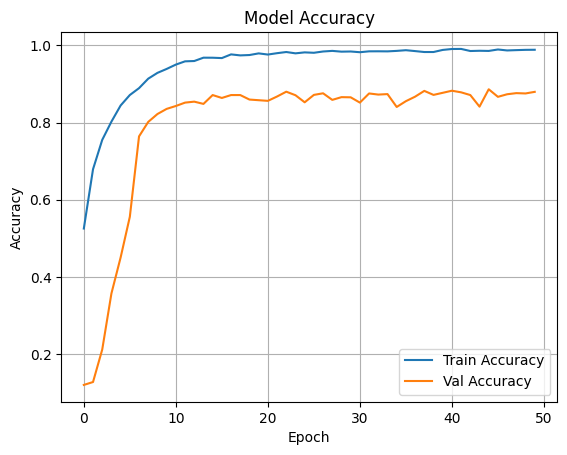

In [8]:
# accuracy plot:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


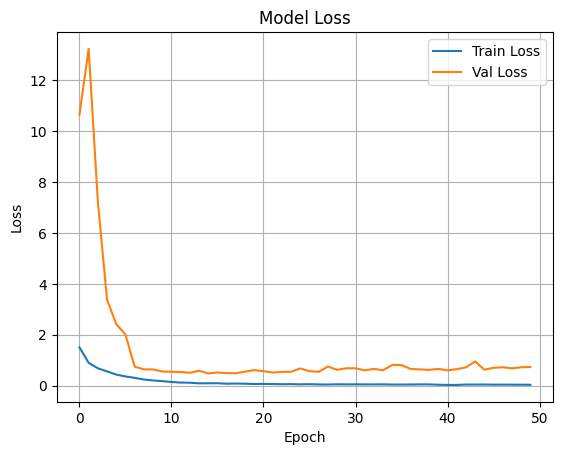

In [9]:
# loss plot:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc:.2%}")

Final Validation Accuracy: 87.96%


After training for 50 epochs, this architecture achieved a final validation accuracy of 87.96%. The learning curves show consistent performance improvement and imited overfitting. This confirms that the design choices were effective.

In conclusion, the deeper CNN with increasing filter sizes, batch normilzation, and dropout were able to extract better features and improve generatlization. Adam optimizer with tuned learning rate helped to achieve a smoother convergence. These changes combined helped to increase the validation accuracy to 87.96%